In [1]:
import json
import sys
import fit
import task
import evaluate
import visualize
import networkx as nx
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


# Write parameters to config.json

In [2]:
config = \
{
    "data": "karate",
    "weighted": "false",
    "directed": "false",
    "method": "node2vec",
    "task": "NodeClassification",
    "emb-path": "embedding/karate-n2v.emb",
    "eval-path": "evaluation/karate-n2v.txt",
    "train_percent": [
        0.1,
        0.5,
        0.9
    ],
    "dimensions": 10,
    "iter": 1,
    "seed": 1,
    "p": 1,
    "q": 1,
    "window-size": 10,
    "num-walks": 10,
    "walk-size": 80,
    "num-shuffles": 1,
    "order": 10,
    "fig-path": "plots/karate-n2v.png"
}

with open("config.json", "w") as jsonfile:
    jsonfile.write(json.dumps(config))
    print("Write successful")

Write successful


# config.json

In [3]:
config_file = open("config.json", "r")
config = json.load(config_file)

# Read data

In [4]:
data = config['data']

In [5]:
data_path = "data/" + data + ".gpickle"
G = nx.read_gpickle(data_path)

In [6]:
G.number_of_nodes()

34

In [7]:
G.number_of_edges()

77

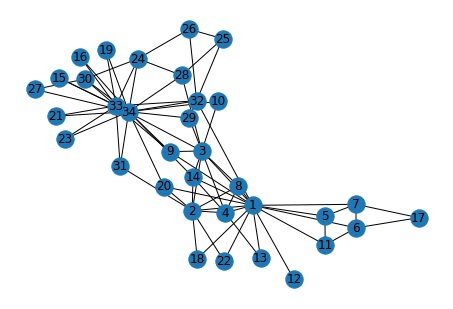

In [8]:
nx.draw(G, with_labels=True)

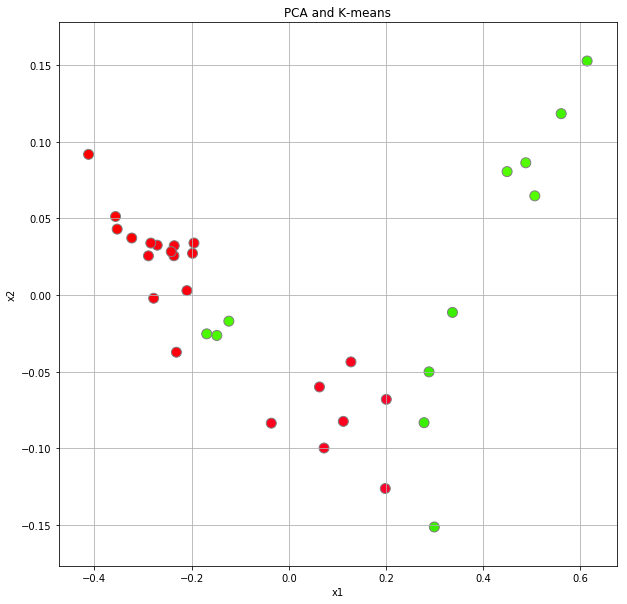

In [9]:
visualize.visualize(config)

In [10]:
task.train(G, config)

training percentage:  0.1
micro F1: 0.0968
macro F1: 0.0588
accuracy score: 0.0968
zero-one loss: 0.9032


training percentage:  0.5
micro F1: 0.7059
macro F1: 0.4967
accuracy score: 0.7059
zero-one loss: 0.2941


training percentage:  0.9
micro F1: 0.7500
macro F1: 0.5556
accuracy score: 0.7500
zero-one loss: 0.2500


